<a href="https://colab.research.google.com/github/YanaAbakumova/Neural_networks/blob/lesson_1/Lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Домашнее задание

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев).

2. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split

In [6]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return (x)*(1 - (x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

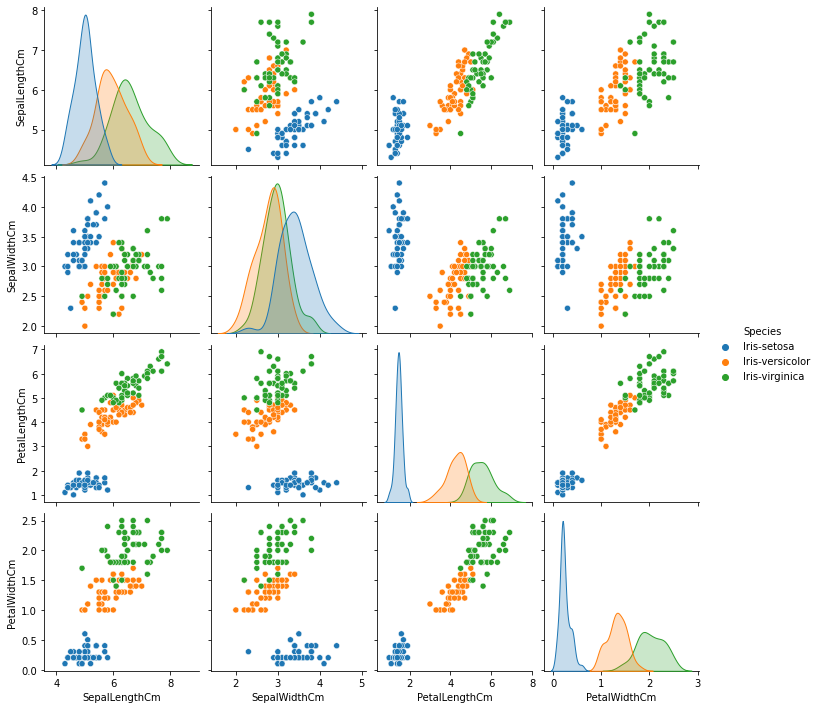

In [7]:
### Шаг 2. Подготовка тренировочных данных
iris_data = pd.read_csv("/content/drive/My Drive/Iris.csv")


# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

### Параметры для 2х-слойной нейронной сети:

После подбрра лучшие параметры (+/-, учитывая элемент случайности) получились такие:

- Кол-во нейронов: 13
- Learning rate: 0.15
- Кол-во эпох: 20000


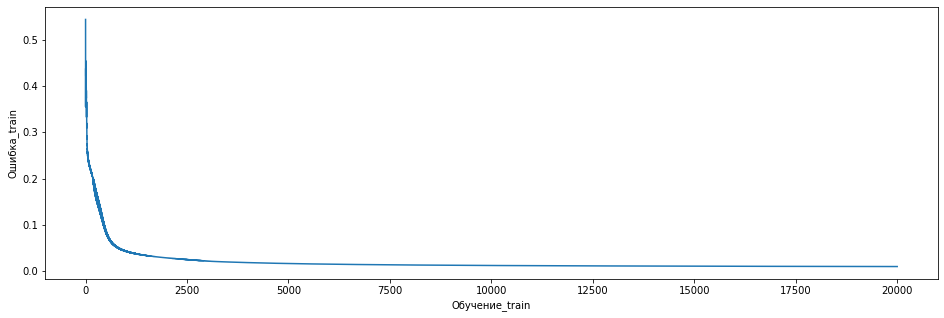

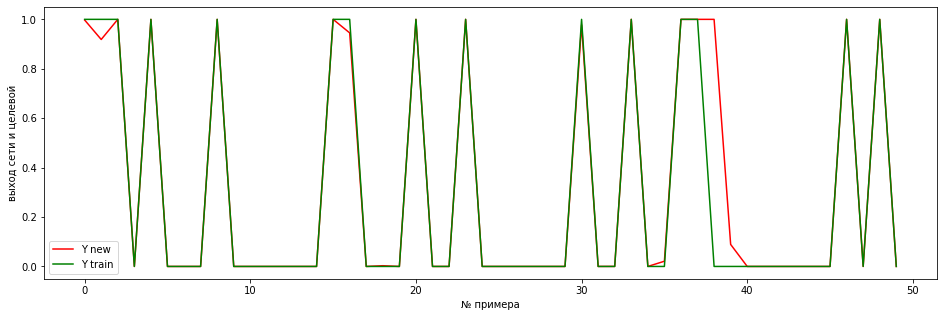

Аккуратность нейронной сети на train 99.02%


In [66]:
neuron_numb = 13

w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.15

# массив для ошибок, чтобы потом построить график
train_errors = []
test_errors = []

# процесс обучения
for i in range(20000):

    # прямое распространение(feed forward)
    layer0_train = X_train
    layer1_train = sigmoid(np.dot(layer0_train, w0))
    layer2_train= sigmoid(np.dot(layer1_train, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2_train# производная функции потерь = производная квадратичных потерь 
    layer2_delta = layer2_error * sigmoid_deriv(layer2_train)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1_train)
    # коррекция
    w1 += layer1_train.T.dot(layer2_delta) * n
    w0 += layer0_train.T.dot(layer1_delta) * n
    # метрика модели
    error = np.mean(np.abs(layer2_error))
    train_errors.append(error)
    accuracy = (1 - error) * 100

    # test
    layer0_test = X_test
    layer1_test = sigmoid(np.dot(layer0_test, w0))
    layer2_test = sigmoid(np.dot(layer1_test, w1))
    test_error = np.mean(abs(y_test - layer2_test))
    test_errors.append(test_error)
    test_accuracy = (1-test_error)*100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(train_errors)
plt.xlabel('Обучение_train')
plt.ylabel('Ошибка_train')
plt.show() 

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_train[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() 
        
print("Аккуратность нейронной сети на train " + str(round(accuracy,2)) + "%")




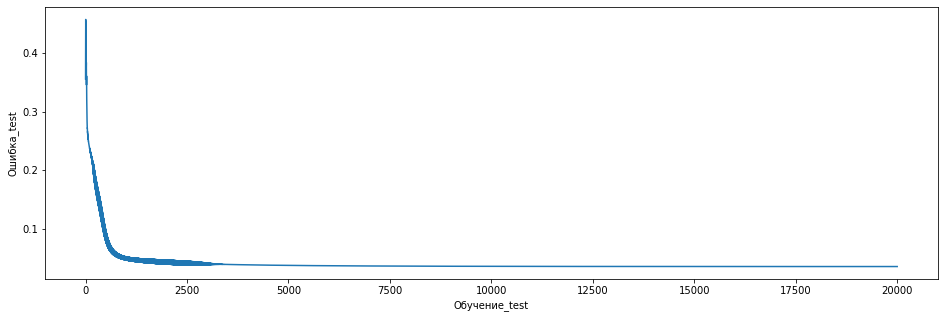

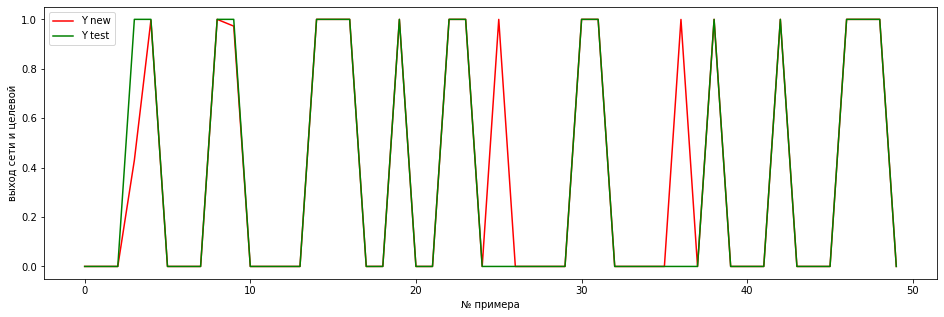

Аккуратность нейронной сети на test 96.43%


In [67]:
plt.figure(figsize = (16,5))
plt.plot(test_errors)
plt.xlabel('Обучение_test')
plt.ylabel('Ошибка_test')
plt.show() 

plt.figure(figsize = (16,5))
plt.plot(layer2_test[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y test')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() 
        
print("Аккуратность нейронной сети на test " + str(round(test_accuracy,2)) + "%")

### Параметры для 3х-слойной нейронной сети:

- Кол-во нейронов: 8
- Learning rate: 0.13
- Кол-во эпох: 20000

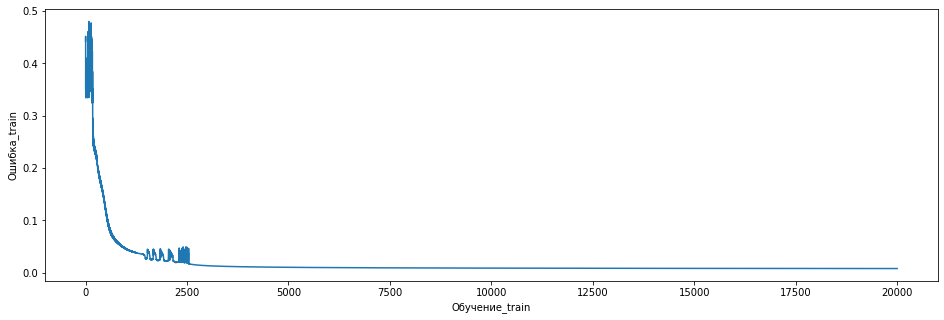

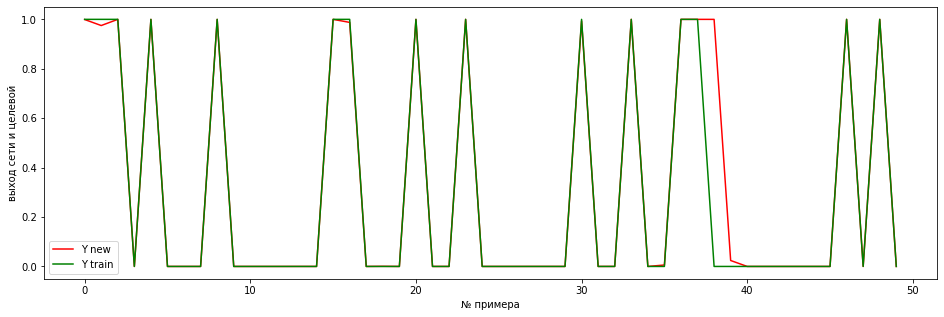

Аккуратность нейронной сети на train 99.19%


In [91]:
neuron_numb = 8

w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((neuron_numb, neuron_numb))
w2 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.13

# массив для ошибок, чтобы потом построить график
train_errors = []
test_errors = []

# процесс обучения
for i in range(20000):

    # прямое распространение(feed forward)
    layer0_train = X_train
    layer1_train = sigmoid(np.dot(layer0_train, w0))
    layer2_train= sigmoid(np.dot(layer1_train, w1))
    layer3_train= sigmoid(np.dot(layer2_train, w2))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer3_error = y_train - layer3_train # производная функции потерь = производная квадратичных потерь 
    layer3_delta = layer3_error * sigmoid_deriv(layer3_train)

    layer2_error = layer3_delta.dot(w2.T)
    layer2_delta = layer2_error * sigmoid_deriv(layer2_train)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1_train)
    # коррекция
    w2 += layer2_train.T.dot(layer3_delta) * n
    w1 += layer1_train.T.dot(layer2_delta) * n
    w0 += layer0_train.T.dot(layer1_delta) * n
    # метрика модели
    error = np.mean(np.abs(layer3_error))
    train_errors.append(error)
    accuracy = (1 - error) * 100

    # test
    layer0_test = X_test
    layer1_test = sigmoid(np.dot(layer0_test, w0))
    layer2_test = sigmoid(np.dot(layer1_test, w1))
    layer3_test = sigmoid(np.dot(layer2_test, w2))
    test_error = np.mean(abs(y_test - layer3_test))
    test_errors.append(test_error)
    test_accuracy = (1-test_error)*100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(train_errors)
plt.xlabel('Обучение_train')
plt.ylabel('Ошибка_train')
plt.show() 

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer3_train[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() 
        
print("Аккуратность нейронной сети на train " + str(round(accuracy,2)) + "%")

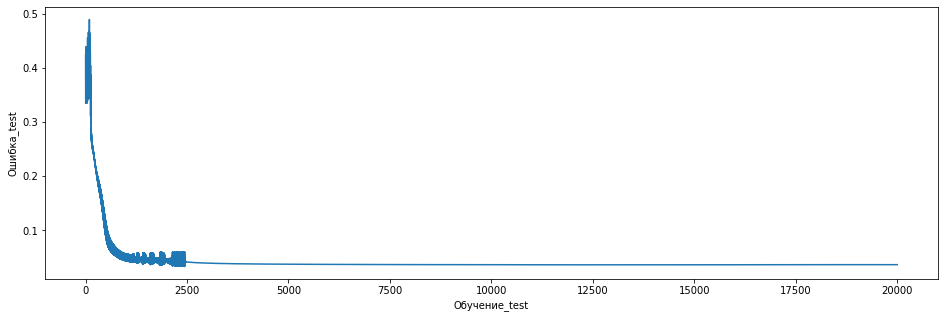

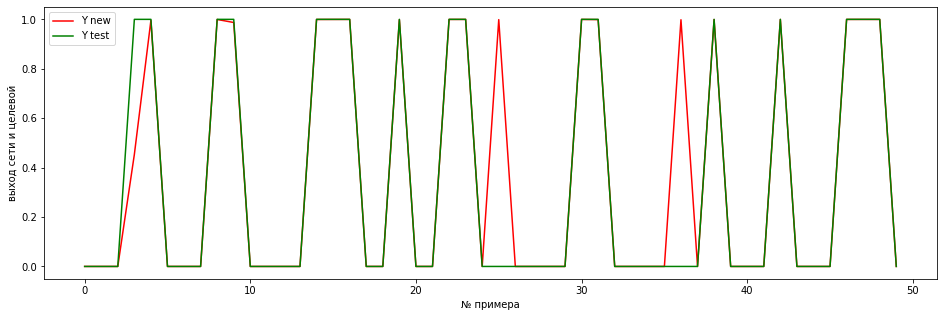

Аккуратность нейронной сети на test 96.31%


In [82]:
plt.figure(figsize = (16,5))
plt.plot(test_errors)
plt.xlabel('Обучение_test')
plt.ylabel('Ошибка_test')
plt.show() 

plt.figure(figsize = (16,5))
plt.plot(layer3_test[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y test')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() 
        
print("Аккуратность нейронной сети на test " + str(round(test_accuracy,2)) + "%")

Результат работы 3х слойной модели не намного лучше, чем 2х слойной, поэтому 3й слой кажется лишним, неоправданно усложняющим модель.

2-слойной модели нужно больше нейронов для демонстрации хорошего результата. Лучший результат 2-слойной модели достигнут при 13 нейронах, 3х-слойной - при 8.

Параметры learning_rate и кол-во эпох для обеих моделей примерно одинаковое, для трехслойной чуть пониже learning rate (+- момент случайной генерации весов).

К ухудшению точности модели приводит недостаток или избыток значений любых рассмотренных параметров :) Маленький lr и недостаточное число эпох могут привести к тому, что значение минимума не будет достигнуто. Слишком большой lr - к тому, что модель будет "вылетать" из минимума, дисперсия очень заметно возрастает. При увеличении кол-ва эпох результат на трейне улучшается, на тесте становится незначительно хуже. Если нейронов слишком мало, модель недостаточно хорошо улавливает закономерности, аккуратность низкая. Если слишком много - все веса становятся слишком маленькими, результат получается в виде близкой к нулю линии.
